In [226]:
# Dependencies

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np





In [3]:
# Create dataframe from csv file

file = 'USvideos.csv'

youtube_df = pd.read_csv(file)


youtube_df = youtube_df.sort_values('views',ascending=False)

youtube_df['Formatted Date'] = youtube_df['trending_date'].str[0:2] + "." + youtube_df['trending_date'].str[6:8] + "." + youtube_df['trending_date'].str[3:5]

youtube_df.head()

# youtube_df = youtube_df.sort_values('Formatted Date',ascending=True)

youtube_df[['Publish Date','Publish Time']] = youtube_df.publish_time.str.split("T",expand=True)

youtube_df.head()

# df[['First','Last']] = df.Name.str.split("_",expand=True) 

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Formatted Date,Publish Date,Publish Time
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,18.06.02,2018-05-06,04:00:07.000Z
38345,VYOjWnS4cMY,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,512337,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,18.06.01,2018-05-06,04:00:07.000Z
38146,VYOjWnS4cMY,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,509799,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,18.05.31,2018-05-06,04:00:07.000Z
37935,VYOjWnS4cMY,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,501722,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,18.05.30,2018-05-06,04:00:07.000Z
37730,VYOjWnS4cMY,18.29.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016,4776680,321493,496211,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,18.05.29,2018-05-06,04:00:07.000Z


In [4]:
# creating a clean dataframe to work with
clean_youtube_df = pd.DataFrame({"Video ID":youtube_df['video_id'],
                                "Trending Date":youtube_df['Formatted Date'],
                                "Title":youtube_df['title'],
                                "Channel Title":youtube_df['channel_title'],
                                "Category ID":youtube_df['category_id'],
                                "Publish Date":youtube_df['Publish Date'],
                                "Publish Time":youtube_df['Publish Time'],
                                "Tags":youtube_df['tags'].str.replace('"',''),
                                "Views":youtube_df['views'],
                                "Likes":youtube_df['likes'],
                                "Dislikes":youtube_df['dislikes'],
                                "Comment Count":youtube_df['comment_count'],
                                "Comments Disabled":youtube_df['comments_disabled'],
                                "Ratings Disabled":youtube_df['ratings_disabled'],
                                "Description":youtube_df['description']})

clean_youtube_df

,Video ID,Trending Date,Title,Channel Title,Category ID,Publish Date,Publish Time,Tags,Views,Likes,Dislikes,Comment Count,Comments Disabled,Ratings Disabled,Description
38547,VYOjWnS4cMY,18.06.02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06,04:00:07.000Z,Childish Gambino|Rap|This Is America|mcDJ Reco...,225211923,5023450,343541,517232,False,False,“This is America” by Childish Gambino http://s...
38345,VYOjWnS4cMY,18.06.01,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06,04:00:07.000Z,Childish Gambino|Rap|This Is America|mcDJ Reco...,220490543,4962403,338105,512337,False,False,“This is America” by Childish Gambino http://s...
38146,VYOjWnS4cMY,18.05.31,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06,04:00:07.000Z,Childish Gambino|Rap|This Is America|mcDJ Reco...,217750076,4934188,335462,509799,False,False,“This is America” by Childish Gambino http://s...
37935,VYOjWnS4cMY,18.05.30,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06,04:00:07.000Z,Childish Gambino|Rap|This Is America|mcDJ Reco...,210338856,4836448,326902,501722,False,False,“This is America” by Childish Gambino http://s...
37730,VYOjWnS4cMY,18.05.29,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06,04:00:07.000Z,Childish Gambino|Rap|This Is America|mcDJ Reco...,205643016,4776680,321493,496211,False,False,“This is America” by Childish Gambino http://s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,-JVITToppE0,17.11.16,Coach Taggart Monday Presser Ahead of Arizona,GoDucksdotcom,17,2017-11-13,20:41:45.000Z,Oregon|Ducks|college athletics|college footbal...,687,10,2,5,False,False,Coach Taggart addresses the media ahead of the...
14531,dQMZLXaa1L8,18.01.27,Artwork Forge,Palo Alto Online,17,2018-01-10,23:53:56.000Z,[none],658,1,0,0,False,False,Artwork Forge II - an art installation created...
14782,y6KYFcta4SE,18.01.28,"1 dead, others injured after Ky. school shooting",Newsy,25,2018-01-23,15:30:01.000Z,shooting|kentucky|breaking news|u.s. news|mars...,559,9,0,4,False,False,Kentucky Gov. Matt Bevin confirmed there was a...
14563,y6KYFcta4SE,18.01.27,"1 dead, others injured after Ky. school shooting",Newsy,25,2018-01-23,15:30:01.000Z,shooting|kentucky|breaking news|u.s. news|mars...,554,9,0,4,False,False,Kentucky Gov. Matt Bevin confirmed there was a...


In [5]:
# dropping duplicates so that we are left with last record for each video
video_df = clean_youtube_df.drop_duplicates('Video ID')

cleanvideo_df = video_df.reset_index(drop=True)

cleanvideo_df

,Video ID,Trending Date,Title,Channel Title,Category ID,Publish Date,Publish Time,Tags,Views,Likes,Dislikes,Comment Count,Comments Disabled,Ratings Disabled,Description
0,VYOjWnS4cMY,18.06.02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06,04:00:07.000Z,Childish Gambino|Rap|This Is America|mcDJ Reco...,225211923,5023450,343541,517232,False,False,“This is America” by Childish Gambino http://s...
1,FlsCjmMhFmw,17.12.14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06,17:58:51.000Z,Rewind|Rewind 2017|youtube rewind 2017|#YouTub...,149376127,3093544,1643059,810698,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
2,ffxKSjUwKdU,18.05.14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20,04:00:03.000Z,Ariana|Grande|No|Tears|Left|To|Cry|Universal|R...,148689896,3094021,129502,242039,False,False,No Tears Left To Cry (Official Video)Song Avai...
3,zEf423kYfqk,18.05.15,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20,10:40:51.000Z,Becky G|Natti Natasha|Natti Natasha Music|Natt...,139334502,1425496,119798,83941,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...
4,7C2z4GqqS5E,18.06.01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18,09:00:02.000Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄|FAKE LOVE|FAKE...,123010920,5613827,206892,1228655,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,qg0GdM60syI,17.11.14,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,27,2017-03-31,21:46:53.000Z,90s commercials|Huffy,773,2,0,0,False,False,Anyone have one of those?
6347,zeQaJGkFyqQ,18.01.18,"Raw: 3 South Carolina Deputies, 1 Officer Shot",Associated Press,25,2018-01-16,12:16:44.000Z,news|associated press|ap|ap online|associated ...,748,9,0,0,True,False,Three deputies and one police officer were sho...
6348,dQMZLXaa1L8,18.01.29,Artwork Forge,Palo Alto Online,17,2018-01-10,23:53:56.000Z,[none],745,1,0,0,False,False,Artwork Forge II - an art installation created...
6349,-JVITToppE0,17.11.17,Coach Taggart Monday Presser Ahead of Arizona,GoDucksdotcom,17,2017-11-13,20:41:45.000Z,Oregon|Ducks|college athletics|college footbal...,704,10,2,5,False,False,Coach Taggart addresses the media ahead of the...


In [17]:
# Want to see what TAGS column looks like in original dataframe

cleanvideo_df['Tags'].value_counts()



[none]                                                                                                                                                                                                                                                                                                                                                                                                                                                                    258
The Late Show|Stephen Colbert|Colbert|Late Show|celebrities|late night|talk show|skits|bit|monologue|The Late Late Show|Late Late Show|letterman|david letterman|comedian|impressions|CBS|joke|jokes|funny|funny video|funny videos|humor|celebrity|celeb|hollywood|famous|James Corden|Corden|Comedy                                                                                                                                                                      25
James Corden|The Late Late Show|Colbert|late night|late night show|Stephen C

In [187]:
# creating boolean variable to show those that have tags and those that do not have tags and adding as a column in dataframe
cleanvideo_df['Has Tags'] = cleanvideo_df['Tags']!='[none]'


# showing dataframe with new column

cleanvideo_df.head()

,Video ID,Trending Date,Title,Channel Title,Category ID,Publish Date,Publish Time,Tags,Views,Likes,Dislikes,Comment Count,Comments Disabled,Ratings Disabled,Description,Has Tags
0,VYOjWnS4cMY,18.06.02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06,04:00:07.000Z,Childish Gambino|Rap|This Is America|mcDJ Reco...,225211923,5023450,343541,517232,False,False,“This is America” by Childish Gambino http://s...,True
1,FlsCjmMhFmw,17.12.14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06,17:58:51.000Z,Rewind|Rewind 2017|youtube rewind 2017|#YouTub...,149376127,3093544,1643059,810698,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",True
2,ffxKSjUwKdU,18.05.14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20,04:00:03.000Z,Ariana|Grande|No|Tears|Left|To|Cry|Universal|R...,148689896,3094021,129502,242039,False,False,No Tears Left To Cry (Official Video)Song Avai...,True
3,zEf423kYfqk,18.05.15,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20,10:40:51.000Z,Becky G|Natti Natasha|Natti Natasha Music|Natt...,139334502,1425496,119798,83941,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,True
4,7C2z4GqqS5E,18.06.01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18,09:00:02.000Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄|FAKE LOVE|FAKE...,123010920,5613827,206892,1228655,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,True


In [183]:
# showing number of vidoes with tags and number of videos without tags

cleanvideo_df['Has Tags'].value_counts()

True     6093
False     258
Name: Has Tags, dtype: int64

In [200]:
# want to work with smaller sample of videos with tags, creating new dataframe with sample of video with tags

# creating hastags_df first

hastags_df = cleanvideo_df[cleanvideo_df['Tags']!='[none]']

# taking sample from hastags_df equivalent to number of videos with 'none'

hastags_sample = hastags_df.sample(n=258)

# showing hastags_sample

hastags_sample.head()

,Video ID,Trending Date,Title,Channel Title,Category ID,Publish Date,Publish Time,Tags,Views,Likes,Dislikes,Comment Count,Comments Disabled,Ratings Disabled,Description,Has Tags
2679,0b6l7MIaGdA,17.12.21,"No Moore! | December 13, 2017 Act 1 | Full Fro...",Full Frontal with Samantha Bee,22,2017-12-14,07:00:01.000Z,Full Frontal with Samantha Bee|Full Frontal|Sa...,708572,11352,1096,807,False,False,Alabamians dealt a blow to Republicans by narr...,True
2374,HTi1c_tLnqw,17.12.19,Nick Jonas - Home,NickJonasVEVO,10,2017-12-13,15:00:01.000Z,Nick Jonas|Home|Ferdinand|Nick|Jonas|Island|Re...,869519,46606,634,1472,False,False,Directed by Nicholas Lam\nProduced by Anthem F...,True
3530,nQtcl7kCkzg,18.02.23,Every Team's Longest Play of the 2017 Season! ...,NFL,17,2018-02-15,03:17:14.000Z,NFL|Football|offense|defense|afc|nfc|American ...,409118,5296,135,939,False,False,Check out the longest offensive play of every ...,True
2185,d3h_uD-5d7A,18.01.28,Best of Beauty 2017 | Zoella,Zoella,26,2018-01-22,16:39:04.000Z,zoe sugg|zoe|sugg|zoella|beauty|cosmetics|fash...,992396,54016,1648,494,False,False,Best of Beauty 2017\n⇢ Previous Video: http://...,True
428,OZsYiWBgFOk,18.04.06,The Spy Who Dumped Me (2018 Movie) Teaser Trai...,Lionsgate Movies,1,2018-03-21,18:50:14.000Z,the spy who dumped me|Mila Kunis|Kate McKinnon...,5229704,12469,2764,1689,False,False,"The Spy Who Dumped Me – In Theaters August 3, ...",True


In [199]:
# creating dataframe of just those videos with notags

notags_df = cleanvideo_df[cleanvideo_df['Tags']=='[none]']

# showing notags_df

notags_df.head()

,Video ID,Trending Date,Title,Channel Title,Category ID,Publish Date,Publish Time,Tags,Views,Likes,Dislikes,Comment Count,Comments Disabled,Ratings Disabled,Description,Has Tags
68,9TUBf6l7FBg,18.04.16,Coachella 2018 LIVE Channel 1,Coachella,10,2018-04-05,06:48:28.000Z,[none],24004779,0,0,3,False,True,For more cameras and VR180 immersive experienc...,False
69,yvicqMrAHvQ,18.02.11,Turkish Airlines - 5 Senses with Dr. Oz,Turkish Airlines,19,2018-02-04,23:55:21.000Z,[none],23932421,4666,374,465,False,False,🌍✈️\nThere is a world of miracles. Get out the...,False
90,wbSwFU6tY1c,18.02.16,Falcon Heavy Test Flight,SpaceX,28,2018-02-06,21:03:04.000Z,[none],20658640,384958,12623,38514,False,False,"Following its first test launch, Falcon Heavy ...",False
93,fAIX12F6958,18.06.14,Bumblebee (2018) - Official Teaser Trailer - P...,Paramount Pictures,1,2018-06-05,07:00:01.000Z,[none],19864779,228670,16420,46318,False,False,Every adventure has a beginning. Watch the off...,False
95,Zr4md5OqL60,18.02.09,Bud Light - The Bud Knight,Bud Light,24,2018-02-01,13:38:42.000Z,[none],19669098,33575,9632,3548,False,False,Hark! A hero arriveth to smite thine enemies a...,False


In [208]:
# combining notags_df with hastags_sample to create tags_df

tags_df = notags_df.append(hastags_sample)

tags_df.head()



,Video ID,Trending Date,Title,Channel Title,Category ID,Publish Date,Publish Time,Tags,Views,Likes,Dislikes,Comment Count,Comments Disabled,Ratings Disabled,Description,Has Tags
68,9TUBf6l7FBg,18.04.16,Coachella 2018 LIVE Channel 1,Coachella,10,2018-04-05,06:48:28.000Z,[none],24004779,0,0,3,False,True,For more cameras and VR180 immersive experienc...,False
69,yvicqMrAHvQ,18.02.11,Turkish Airlines - 5 Senses with Dr. Oz,Turkish Airlines,19,2018-02-04,23:55:21.000Z,[none],23932421,4666,374,465,False,False,🌍✈️\nThere is a world of miracles. Get out the...,False
90,wbSwFU6tY1c,18.02.16,Falcon Heavy Test Flight,SpaceX,28,2018-02-06,21:03:04.000Z,[none],20658640,384958,12623,38514,False,False,"Following its first test launch, Falcon Heavy ...",False
93,fAIX12F6958,18.06.14,Bumblebee (2018) - Official Teaser Trailer - P...,Paramount Pictures,1,2018-06-05,07:00:01.000Z,[none],19864779,228670,16420,46318,False,False,Every adventure has a beginning. Watch the off...,False
95,Zr4md5OqL60,18.02.09,Bud Light - The Bud Knight,Bud Light,24,2018-02-01,13:38:42.000Z,[none],19669098,33575,9632,3548,False,False,Hark! A hero arriveth to smite thine enemies a...,False


In [240]:
# display views for those with tags and those without tags

hastags_groups = tags_df.groupby('Has Tags')
hastags_views = hastags_groups['Views'].sum()

hastags_views

Has Tags
False    346174150
True     492421145
Name: Views, dtype: int64

<IPython.core.display.Javascript object>


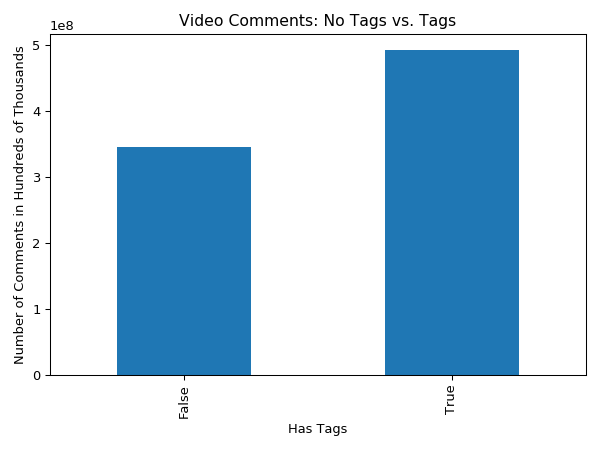

In [250]:
# create chart to visualize this data

views_chart = hastags_views.plot(kind="bar", title="Views of Videos: No Tags Vs. Tags")
views_chart.set_xlabel("Has Tags")
views_chart.set_ylabel("Number of Views in Hundreds of MIllions")

plt.tight_layout()
plt.savefig("viewsnotagsvstags.png")
plt.show()

In [244]:
# comparing likes with videos with tags vs videos without tags

hastags_likes = hastags_groups['Likes'].sum()

hastags_likes

Has Tags
False     6356362
True     15831116
Name: Likes, dtype: int64

In [254]:
# creating chart to show comparison of likes with videos with tags vs. videos without tags

likes_chart = hastags_likes.plot(kind="bar", title="Video Likes: No Tags vs Tags")
likes_chart.set_xlabel("Has Tags")
likes_chart.set_ylabel("Number of Likes in Tens of Millions")
plt.tight_layout()
plt.savefig("likesnotagsvstags.png")
plt.show()

In [253]:
# comparing comments with videos with tags vs videos without tags

hastags_comments = hastags_groups['Comment Count'].sum()
hastags_comments

Has Tags
False     685975
True     2297523
Name: Comment Count, dtype: int64

In [257]:
# creating chart of comments comparison

comments_chart = hastags_comments.plot(kind="bar", title="Video Comments: No Tags vs. Tags")
comments_chart.set_xlabel("Has Tags")
comments_chart.set_ylabel("Number of Comments in Hundreds of Thousands")
plt.tight_layout()
plt.savefig("commentsnotagsvstags.png")
plt.show()

